### Import Libary for EDA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load Data

In [2]:
data = pd.read_csv('customer_churn.csv')
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


### Handle Mising Data & Duplicate

In [5]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [3]:
data.dropna(inplace=True)

In [4]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

### Visual Data

C:\Users\M S I\AppData\Local\Temp\ipykernel_24000\3778240733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = churn_count.index, x = churn_count.values, palette='magma', orient='h')


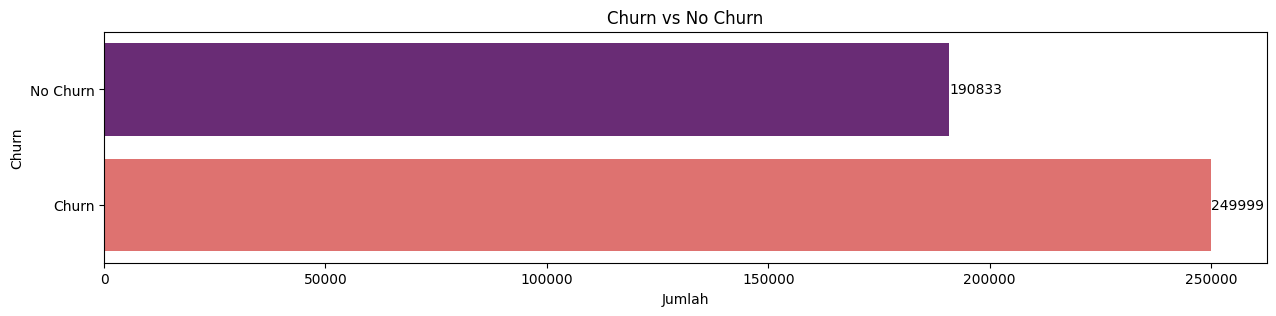

In [9]:
# cek value churn 
plt.figure(figsize = (15, 3))
churn_count = data['Churn'].value_counts(ascending=True)
sns.barplot(y = churn_count.index, x = churn_count.values, palette='magma', orient='h')
plt.title('Churn vs No Churn')
plt.xlabel('Jumlah')
plt.ylabel('Churn')
plt.yticks([0, 1], ['No Churn', 'Churn'])
for i , value in enumerate(churn_count.values):
    plt.text(value, i, str(value), ha = 'left', va = 'center')
plt.show()

In [10]:
categorical_col = ['Gender', 'Subscription Type', 'Contract Length']
numeric_col = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

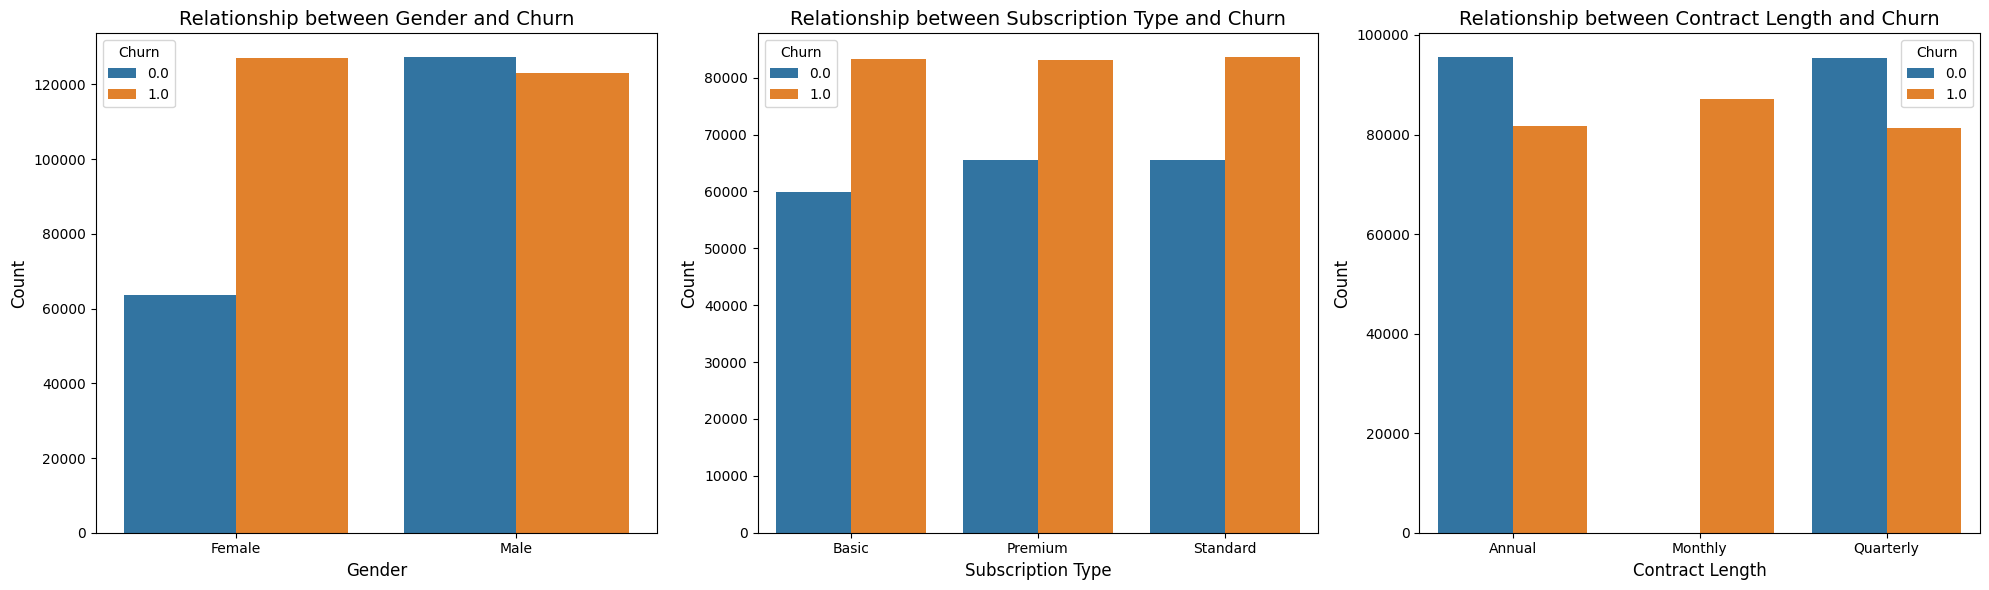

In [11]:
# visualisasi relationship categorical column
fig , axes = plt.subplots(nrows = 1, ncols=3, figsize = (20,6))
for i , col in enumerate(categorical_col):
    churn_count = data.groupby([col, 'Churn']).size().reset_index(name='Count')
    sns.barplot(x = col, y = 'Count', hue = 'Churn', data = churn_count, ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and Churn', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='Churn')
plt.tight_layout()
plt.show()


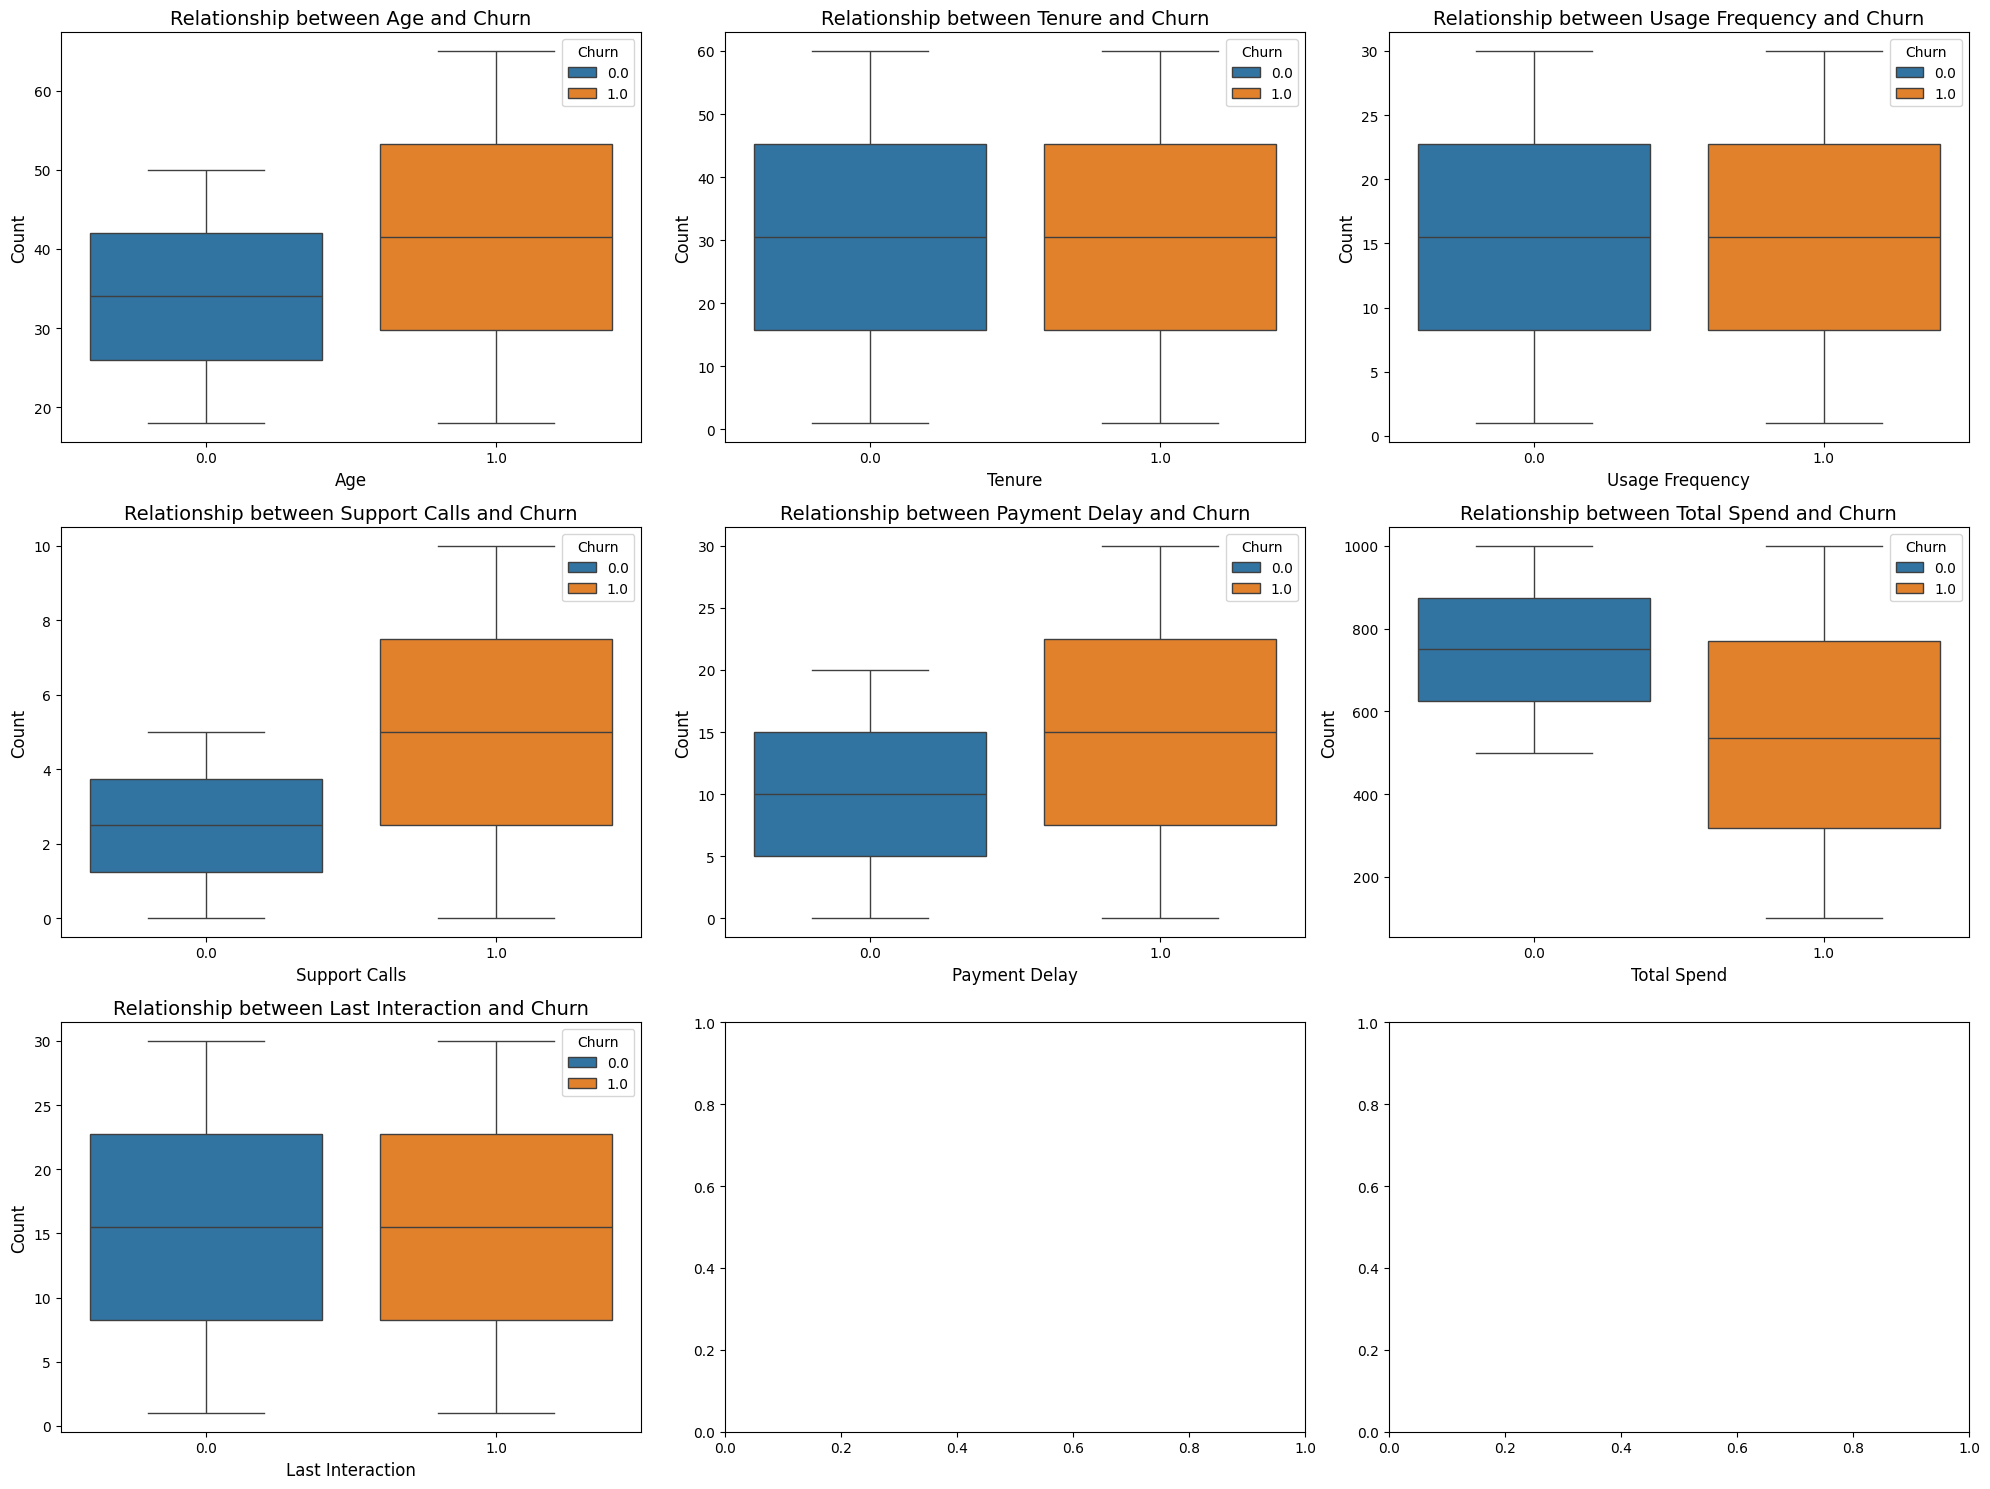

In [12]:
# visualisasi relationship numerical column 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numeric_col):
    churn_count = data.groupby([col, 'Churn']).size().reset_index(name='Count')
    sns.boxplot(x='Churn', y = col, hue = 'Churn', data = churn_count, ax = axes[i])
    axes[i].set_title(f'Relationship between {col} and Churn', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()
    

### Preprosessing 

In [6]:
df = data.copy()

In [7]:
df.drop(columns=['CustomerID', 'Age', 'Gender'], inplace= True)

In [8]:
# Mapping Kategori 
sub_map = {'Basic' : 0, 'Standard' : 1, 'Premium' : 2}
cont_map = {'Monthly': 0, 'Quarterly': 1, 'Annual': 2}
# Apply mapping
df['Subscription Type'] = df['Subscription Type'].map(sub_map)
df['Contract Length'] = df['Contract Length'].map(cont_map)


In [9]:
# membuat kolom churn menjadi integer
df['Churn'] = df['Churn'].astype(int)

In [17]:
df

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,39.0,14.0,5.0,18.0,1,2,932.00,17.0,1
1,49.0,1.0,10.0,8.0,0,0,557.00,6.0,1
2,14.0,4.0,6.0,18.0,0,1,185.00,3.0,1
3,38.0,21.0,7.0,7.0,1,0,396.00,29.0,1
4,32.0,20.0,5.0,8.0,0,0,617.00,20.0,1
...,...,...,...,...,...,...,...,...,...
440828,54.0,15.0,1.0,3.0,2,2,716.38,8.0,0
440829,8.0,13.0,1.0,20.0,2,2,745.38,2.0,0
440830,35.0,27.0,1.0,5.0,1,1,977.31,9.0,0
440831,55.0,14.0,2.0,0.0,1,1,602.55,2.0,0


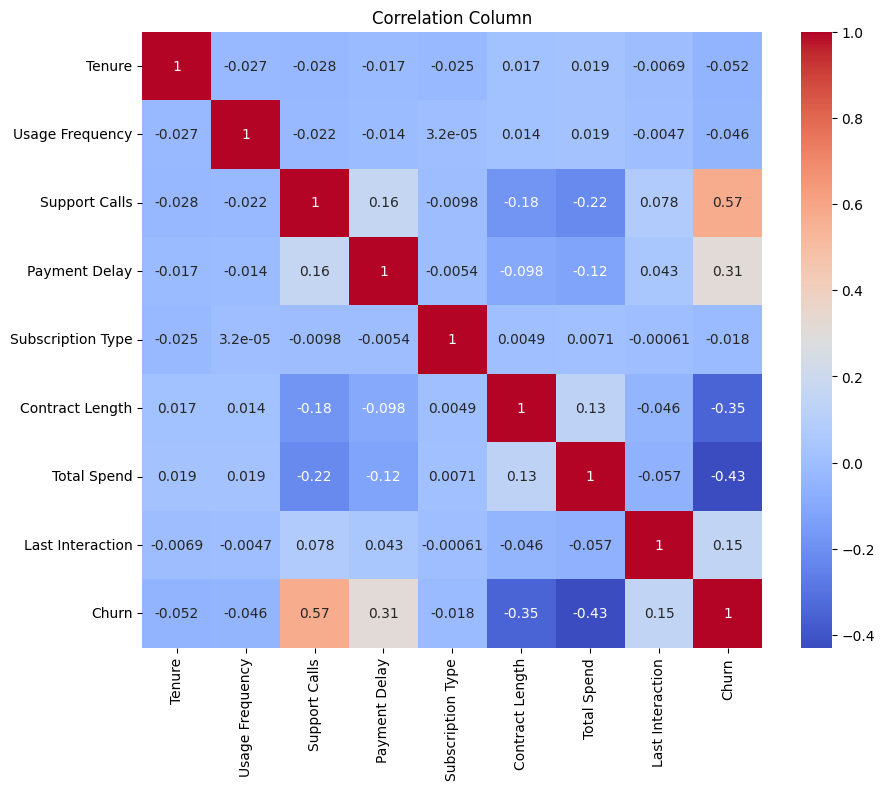

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Column')
plt.show()

### Spliting

In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Check Acuracy Model

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def data_training(X_train, X_test, y_train, y_test, scale_method):
    if scale_method == "StandardScaler":
        scaler = StandardScaler()
    elif scale_method == "MinMaxScaler":
        scaler = MinMaxScaler()
    elif scale_method == "RobustScaler":
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid")

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = []
    models.append(('LR', LogisticRegression(random_state=0)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=6)))
    models.append(('CART', DecisionTreeClassifier(random_state=0)))
    models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=0)))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('XGBoost', XGBClassifier(
        learning_rate=0.23, max_delta_step=5,
        objective='reg:logistic', n_estimators=92,
        max_depth=5, eval_metric="logloss", gamma=3, base_score=0.5)))
    models.append(('SVC', SVC()))
    models.append(('AdaBoost', AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=1, random_state=42),
            n_estimators=50,
            learning_rate=1.0,
            random_state=42
    )))
    models.append(('Bagging', BaggingClassifier(
            estimator=DecisionTreeClassifier(
            random_state=42),
            n_estimators=50,
            max_samples=0.8,
            max_features=1.0,
            random_state=42
    )))
    models.append(('Naive Bayes', GaussianNB()))
    
    res_cols = ["model", "accuracy_score", "scale_method", "0_precision", "0_recall", "1_precision", "1_recall"]
    df_result = pd.DataFrame(columns=res_cols)
    index = 0
    for name, model in models:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, digits=2, output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']

        idx_res_values = [name, score, scale_method, zero_report['precision'], zero_report['recall'], one_report['precision'], one_report['recall']]
        df_result.loc[index, res_cols] = idx_res_values
        index += 1
    df_result = df_result.sort_values("accuracy_score", ascending=False).reset_index(drop=True)
    return df_result

In [23]:
df_sc = data_training(X_train, X_test, y_train, y_test, scale_method='StandardScaler')
df_sc

c:\mypython\final-project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
0,XGBoost,0.961153,StandardScaler,0.922415,0.99359,0.994827,0.936512
1,RF,0.961097,StandardScaler,0.923148,0.992512,0.993967,0.937231
2,Bagging,0.960722,StandardScaler,0.922962,0.991803,0.993399,0.937111
3,GBM,0.959554,StandardScaler,0.919172,0.993695,0.994896,0.933618
4,AdaBoost,0.955176,StandardScaler,0.911204,0.992933,0.994239,0.926493
5,SVC,0.945081,StandardScaler,0.893978,0.990227,0.991914,0.910786
6,KNN,0.93146,StandardScaler,0.868809,0.990857,0.992225,0.886336
7,CART,0.926707,StandardScaler,0.922033,0.906917,0.930157,0.941741
8,Naive Bayes,0.92453,StandardScaler,0.883289,0.950818,0.960334,0.904559
9,LR,0.862443,StandardScaler,0.82612,0.863017,0.892282,0.862007


In [24]:
df_mm = data_training(X_train, X_test, y_train, y_test, scale_method='MinMaxScaler')
df_mm

c:\mypython\final-project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
0,XGBoost,0.961153,MinMaxScaler,0.922415,0.99359,0.994827,0.936512
1,RF,0.961074,MinMaxScaler,0.923083,0.992539,0.993988,0.937171
2,Bagging,0.960722,MinMaxScaler,0.922942,0.991829,0.99342,0.937091
3,GBM,0.959554,MinMaxScaler,0.919172,0.993695,0.994896,0.933618
4,AdaBoost,0.955176,MinMaxScaler,0.911204,0.992933,0.994239,0.926493
5,SVC,0.943652,MinMaxScaler,0.891852,0.989465,0.991271,0.90885
6,KNN,0.930643,MinMaxScaler,0.867489,0.990673,0.992058,0.885039
7,CART,0.926741,MinMaxScaler,0.921882,0.90718,0.930331,0.941601
8,Naive Bayes,0.92453,MinMaxScaler,0.883289,0.950818,0.960334,0.904559
9,LR,0.862386,MinMaxScaler,0.826016,0.863017,0.892271,0.861907


In [25]:
df_rb = data_training(X_train, X_test, y_train, y_test, scale_method='RobustScaler')
df_rb

c:\mypython\final-project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
0,XGBoost,0.961153,RobustScaler,0.922415,0.99359,0.994827,0.936512
1,RF,0.961142,RobustScaler,0.923177,0.992591,0.994031,0.937251
2,Bagging,0.960677,RobustScaler,0.922934,0.991724,0.993336,0.937091
3,GBM,0.959554,RobustScaler,0.919172,0.993695,0.994896,0.933618
4,AdaBoost,0.955176,RobustScaler,0.911204,0.992933,0.994239,0.926493
5,SVC,0.945456,RobustScaler,0.89436,0.990673,0.992283,0.911105
6,KNN,0.932685,RobustScaler,0.870822,0.991094,0.992441,0.888312
7,CART,0.926594,RobustScaler,0.921855,0.906839,0.930092,0.941601
8,Naive Bayes,0.92453,RobustScaler,0.883289,0.950818,0.960334,0.904559
9,LR,0.862443,RobustScaler,0.826169,0.862938,0.892233,0.862067


### Predict

#### Random Forest

In [12]:
from sklearn.pipeline import Pipeline
model_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=0))
])

In [13]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=0))])

In [ ]:
data = [
    ['39.0', '14.0', '5.0', '18.0', '1', '2', '932.00', '17.0'],
    [49.0, 1.0, 10.0, 8.0, 0, 0, 557.00, 6.0],
    ['8.0', '13.0', '1.0', '20.0', '2', '2', '745.38', '2.0'],
    ['35.0', '27.0', '1.0', '5.0', '1', '1', '977.31', '9.0'],
    ['55.0', '14.0', '2.0', '0.0', '1', '1', '602.55', '2.0']
]
result = model_rf.predict(data)
result

array([1, 1, 0, 0, 0])

#### XGBoots

In [14]:
from sklearn.pipeline import Pipeline
model_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(
        learning_rate=0.23, max_delta_step=5,
        objective='reg:logistic', n_estimators=92,
        max_depth=5, eval_metric="logloss", gamma=3, base_score=0.5))
])

In [15]:
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=3, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.23,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=5,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=92, n_jobs=None,
                               num_parallel_tree=None, objective='reg:logistic', ...))])

In [17]:
data = [
    ['39.0', '14.0', '5.0', '18.0', '1', '2', '932.00', '17.0'],
    [49.0, 1.0, 10.0, 8.0, 0, 0, 557.00, 6.0],
    [8, 13, 1, 20, 2, 2, 745.38, 2],
    ['35.0', '27.0', '1.0', '5.0', '1', '1', '977.31', '9.0']
]
result = model_xgb.predict(data)
result

array([1, 1, 0, 0])

### Save Model

In [17]:
import joblib
joblib.dump(model_xgb, 'xgb_model.pkl')

['xgb_model.pkl']